# <font color='red'> [0] Build the model </font> 

## <font color='green'> [0.1] Importation of the package </font> 

In [1]:
from main import *

## <font color='green'> [0.2] Creation of an empty model </font> 

In [2]:
momo = model()

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction


## <font color='green'> [0.3] Add of reaction and metabolite </font> 

In [3]:
momo.metabolites.add(name = "H2O", external = True, concentration = 1.0)

metabolite_reaction = {"H2O" : 1.0,
                       "H2"  :-1.0,
                       "O2"  :-0.5}
momo.reactions.add(name = "combustion", metabolites = metabolite_reaction, k_eq = 1.0, law = "", flux=1.0)

Don't worry, the metabolite will be add after the add of the 1st reaction
The metabolite "H2O" is already in the model !


In [4]:
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)
combustion,"{'H2O': 1.0, 'H2': -1.0, 'O2': -0.5}",1.0,,1.0


#### Add a reaction with specified metabolite and stoichiometric coefficient automaticaly adds them to the model

In [5]:
momo.metabolites.df

,External,Concentration (mmol/gDW)
H2O,True,1.0
H2,False,1.0
O2,False,1.0


#### Print the stoichiometric matrix

In [6]:
momo.Stoichio_matrix

,combustion
H2O,1.0
H2,-1.0
O2,-0.5


#### It is also possible to remove a metabolite or a reaction to the model

In [7]:
momo.metabolites.remove("O2")
momo.metabolites.df

,External,Concentration (mmol/gDW)
H2O,True,1.0
H2,False,1.0


#### Removing a metabolite remove also every mention of it in the reactions dataframe and in the stoichiometric matrix

In [8]:
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)
combustion,"{'H2O': 1.0, 'H2': -1.0}",1.0,,1.0


In [9]:
momo.Stoichio_matrix

,combustion
H2O,1.0
H2,-1.0


In [10]:
momo.reactions.remove(name="combustion")
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)


## <font color='green'> [0.4] Stoichiometric matrix from an existant one </font> 

In [48]:
reactions = {'Combustion': [1. , -1., -0.5],
            'Reaction_2': [0. ,  0.,   0. ]}

metabolites = ['H2O', 'H2', 'O2']

dataframe = pd.DataFrame(reactions, index=metabolites)

momo.Stoichio_matrix = dataframe

#### And the metabolites and reactions dataframes are automatically update

In [49]:
momo.Stoichio_matrix

,Combustion,Reaction_2
H2O,1.0,0.0
H2,-1.0,0.0
O2,-0.5,0.0


In [50]:
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)
Combustion,"{'H2O': 1.0, 'H2': -1.0, 'O2': -0.5}",1.0,,1
Reaction_2,{},1.0,,1


In [51]:
momo.metabolites.df

,External,Concentration (mmol/gDW)
H2O,False,1
H2,False,1
O2,False,1


## <font color='green'> [0.5] Create a linear system </font> 

In [11]:
momo.creat_linear(4)

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction


### Display the variables of the system

In [12]:
momo.metabolites.df

,External,Concentration (mmol/gDW)
meta_0,True,1
meta_1,False,1
meta_2,False,1
meta_3,True,1


In [13]:
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)
reaction_0,"{'meta_0': -1, 'meta_1': 1}",1.0,,1
reaction_1,"{'meta_1': -1, 'meta_2': 1}",1.0,,1
reaction_2,"{'meta_2': -1, 'meta_3': 1}",1.0,,1


In [14]:
momo.enzymes.df

,Concentration / Activity,Reactions linked


#### The enzyme dataframe is empty for the moment

#### We add 1 enzyme linked to each reaction

In [15]:
momo.enzymes.add_to_all_reaction()

In [16]:
momo.enzymes.df

,Concentration / Activity,Reactions linked
enzyme_reaction_0,1,[reaction_0]
enzyme_reaction_1,1,[reaction_1]
enzyme_reaction_2,1,[reaction_2]


In [17]:
momo.parameters.df

,Mean values,Standard deviation
Temperature,273.15,1.0


### There is only the temperture by default

##### We add the externals metabolite as parameters

In [18]:
momo.parameters.add_externals()

In [19]:
momo.parameters.df

,Mean values,Standard deviation
Temperature,273.15,1.0
meta_0_para,1.0,1.0
meta_3_para,1.0,1.0


##### And the enzymes too

In [20]:
momo.parameters.add_enzymes()

In [21]:
momo.parameters.df

,Mean values,Standard deviation
Temperature,273.15,1.0
meta_0_para,1.0,1.0
meta_3_para,1.0,1.0
enzyme_reaction_0_para,1.0,1.0
enzyme_reaction_1_para,1.0,1.0
enzyme_reaction_2_para,1.0,1.0


### Elasticities

#### When the .add_externals() and .add_enzymes() are call, it automatically add default values considering the link in the dataframe

In [22]:
momo.elasticity.p

,Temperature,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para
reaction_0,0,0.5,0.0,1.0,0.0,0.0
reaction_1,0,0.0,0.0,0.0,1.0,0.0
reaction_2,0,0.0,-0.5,0.0,0.0,1.0


In [23]:
momo.elasticity.s

,meta_0,meta_1,meta_2,meta_3
reaction_0,0,0,0,0
reaction_1,0,0,0,0
reaction_2,0,0,0,0


#### We can add default value to the E_s matrix too

In [24]:
momo.elasticity.half_satured()

momo.elasticity.s

,meta_0,meta_1,meta_2,meta_3
reaction_0,0.5,-0.5,-0.0,-0.0
reaction_1,-0.0,0.5,-0.5,-0.0
reaction_2,-0.0,-0.0,0.5,-0.5


In [25]:
momo.Jacobian

,meta_0,meta_1,meta_2,meta_3
meta_0,-0.5,0.5,0.0,0.0
meta_1,0.5,-1.0,0.5,0.0
meta_2,0.0,0.5,-1.0,0.5
meta_3,0.0,0.0,0.5,-0.5


In [26]:
momo.rho()

,Temperature,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_0,meta_1,meta_2,meta_3,reaction_0,reaction_1,reaction_2
Temperature,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
meta_0_para,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,-0.369274,0.196116,0.196116,0.123091,0.307389,0.406994,0.156174
meta_3_para,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.123091,0.196116,0.196116,-0.369274,-0.051232,-0.090443,0.416463
enzyme_reaction_0_para,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,-0.738549,0.392232,0.392232,0.246183,0.614779,0.813988,0.312348
enzyme_reaction_1_para,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,-0.492366,-0.784465,0.784465,0.492366,0.717242,0.361773,0.104116
enzyme_reaction_2_para,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,-0.246183,-0.392232,-0.392232,0.738549,0.102463,0.180886,-0.832927
meta_0,0.0,-0.369274,0.123091,-0.738549,-0.492366,-0.246183,1.000000,0.144841,-0.627646,-0.696970,-0.952231,-0.985251,-0.083303
meta_1,0.0,0.196116,0.196116,0.392232,-0.784465,-0.392232,0.144841,1.000000,-0.230769,-0.627646,-0.311467,0.026606,0.479842
meta_2,0.0,0.196116,0.196116,0.392232,0.784465,-0.392232,-0.627646,-0.230769,1.000000,0.144841,0.813834,0.594201,0.643192
meta_3,0.0,0.123091,-0.369274,0.246183,0.492366,0.738549,-0.696970,-0.627646,0.144841,1.000000,0.636923,0.595604,-0.621565


### We can also read a SBML file

In [27]:
momo.read_SBML()

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction
0 error detected in your SBML file


In [28]:
momo.enzymes.df

,Concentration / Activity,Reactions linked


In [29]:
momo.enzymes.add_to_all_reaction()
momo.parameters.add_externals()
momo.parameters.add_enzymes()

In [30]:
print(f"Shape of the stoichio matrix : {momo.Stoichio_matrix.shape} \n")
print(f"numbers of metabolite in the model : {momo.metabolites.len} \n")
print(f"Numbers of reaction in the model : {momo.reactions.len} \n")
print(f"Numbers of enzyme in the model : {momo.enzymes.df.shape[0]} \n")
print(f"Numbers of parameters in the model : {momo.parameters.df.shape[0]} \n")

Shape of the stoichio matrix : (40, 31) 

numbers of metabolite in the model : 40 

Numbers of reaction in the model : 31 

Numbers of enzyme in the model : 31 

Numbers of parameters in the model : 32 



In [31]:
momo.elasticity.half_satured()

In [32]:
momo.elasticity.s

,D_Glucose,Phosphoenolpyruvate,Pyruvate,D_Glucose_6_phosphate,_S_Malate,Acetyl_CoA,Fumarate,cis_Aconitate,_6_Phospho_D_gluconate,Orthophosphate,...,D_Fructose_1_6_bisphosphate,D_Glyceraldehyde_3_phosphate,Citrate,Succinyl_CoA,_3_Phospho_D_glycerate,D_Glucono_1_5_lactone_6_phosphate,D_Fructose_6_phosphate,_2_Phospho_D_glycerate,Succinate,Sedoheptulose_7_phosphate
PTS_RPTSsy,-0.5,-0.5,-0.5,-0.5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
PGI_R02740,-0.0,-0.0,-0.0,-0.5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.5,-0.0,-0.0,-0.0
PFK_R04779,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.5,-0.0,-0.0,-0.0
ALD_R01070,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.5,-0.5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
TIM_R01015,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
GAP_R01061,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.5,...,-0.0,-0.5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
PGK_R01512,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.5,-0.0,-0.0,-0.0,-0.0,-0.0
PGM_R01518,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.5,-0.0,-0.0,-0.5,-0.0,-0.0
PGH_R00658,-0.0,-0.5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.5,-0.0,-0.0
PYK_R00200,-0.0,-0.5,-0.5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


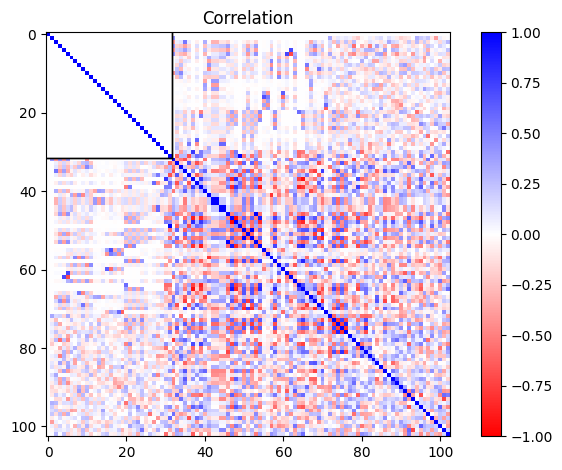

In [33]:
momo.plot(result="rho", label=False, value_in_cell=False)

In [34]:
momo.data_sampling

,Name,Type,Standard deviation,Distribution


In [35]:
momo.data_sampling.loc[1] = [["PTS_RPTSsy","enzyme_PTS_RPTSsy_para"], "elasticity_p", 1, "uniform"]

In [36]:
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)
PTS_RPTSsy,"{'D_Glucose': 1.0, 'Phosphoenolpyruvate': 1.0,...",5.726218e+07,,0.455892
PGI_R02740,"{'D_Glucose_6_phosphate': 1.0, 'D_Fructose_6_p...",3.911890e-01,,0.323686
PFK_R04779,"{'ATP': 1.0, 'ADP': 1.0, 'D_Fructose_1_6_bisph...",1.764869e+03,,0.411823
ALD_R01070,"{'Glycerone_phosphate': 1.0, 'D_Fructose_1_6_b...",1.889019e-01,,0.411823
TIM_R01015,"{'Glycerone_phosphate': 1.0, 'D_Glyceraldehyde...",2.007470e-01,,0.411823
GAP_R01061,"{'Orthophosphate': 1.0, 'NADH': 1.0, 'NADplus'...",7.563514e-04,,0.867715
PGK_R01512,"{'ATP': 1.0, 'ADP': 1.0, '_3_Phospho_D_glycero...",1.883714e+03,,0.867715
PGM_R01518,"{'_3_Phospho_D_glycerate': 1.0, '_2_Phospho_D_...",2.227972e-01,,0.867715
PGH_R00658,"{'Phosphoenolpyruvate': 1.0, '_2_Phospho_D_gly...",5.202263e+00,,0.867715
PYK_R00200,"{'Phosphoenolpyruvate': 1.0, 'Pyruvate': 1.0, ...",2.233581e+04,,0.136239


In [37]:
momo.sampling(10, result="MI", seed_constant=False)

array([[       inf, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        ,        inf, 0.        , ..., 0.0157762 , 0.00316491,
        0.00117644],
       [0.        , 0.        ,        inf, ..., 0.016319  , 0.0103085 ,
        0.05621435],
       ...,
       [0.        , 0.0157762 , 0.016319  , ...,        inf, 0.00100244,
        0.10717774],
       [0.        , 0.00316491, 0.0103085 , ..., 0.00100244,        inf,
        0.02230972],
       [0.        , 0.00117644, 0.05621435, ..., 0.10717774, 0.02230972,
               inf]])

In [38]:
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)
PTS_RPTSsy,"{'D_Glucose': 1.0, 'Phosphoenolpyruvate': 1.0,...",5.726218e+07,,0.455892
PGI_R02740,"{'D_Glucose_6_phosphate': 1.0, 'D_Fructose_6_p...",3.911890e-01,,0.323686
PFK_R04779,"{'ATP': 1.0, 'ADP': 1.0, 'D_Fructose_1_6_bisph...",1.764869e+03,,0.411823
ALD_R01070,"{'Glycerone_phosphate': 1.0, 'D_Fructose_1_6_b...",1.889019e-01,,0.411823
TIM_R01015,"{'Glycerone_phosphate': 1.0, 'D_Glyceraldehyde...",2.007470e-01,,0.411823
GAP_R01061,"{'Orthophosphate': 1.0, 'NADH': 1.0, 'NADplus'...",7.563514e-04,,0.867715
PGK_R01512,"{'ATP': 1.0, 'ADP': 1.0, '_3_Phospho_D_glycero...",1.883714e+03,,0.867715
PGM_R01518,"{'_3_Phospho_D_glycerate': 1.0, '_2_Phospho_D_...",2.227972e-01,,0.867715
PGH_R00658,"{'Phosphoenolpyruvate': 1.0, '_2_Phospho_D_gly...",5.202263e+00,,0.867715
PYK_R00200,"{'Phosphoenolpyruvate': 1.0, 'Pyruvate': 1.0, ...",2.233581e+04,,0.136239


In [39]:
momo.MI([["enzyme_PTS_RPTSsy_para","enzyme_PGI_R02740_para"],["FUM_R01082","MDH_R00342"],["PPC_R00345"]])

,0,1,2
0,inf,0.156032,0.019534
1,0.156032,inf,0.090595
2,0.019534,0.090595,inf


In [40]:
momo.regulations.df

,Regulated flux,Regulator,Coefficient of regulation,Type regulation


In [41]:
momo.regulations.add("reg_test", "PTS_RPTSsy", "D_Glucose", allosteric=False)

In [42]:
momo.regulations.df

,Regulated flux,Regulator,Coefficient of regulation,Type regulation
reg_test,PTS_RPTSsy,PTS_RPTSsy,1,transcriptional


In [43]:
momo.elasticity.s

,D_Glucose,Phosphoenolpyruvate,Pyruvate,D_Glucose_6_phosphate,_S_Malate,Acetyl_CoA,Fumarate,cis_Aconitate,_6_Phospho_D_gluconate,Orthophosphate,...,D_Glyceraldehyde_3_phosphate,Citrate,Succinyl_CoA,_3_Phospho_D_glycerate,D_Glucono_1_5_lactone_6_phosphate,D_Fructose_6_phosphate,_2_Phospho_D_glycerate,Succinate,Sedoheptulose_7_phosphate,enzyme_reg_test
PTS_RPTSsy,-0.5,-0.5,-0.5,-0.5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0
PGI_R02740,-0.0,-0.0,-0.0,-0.5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.5,-0.0,-0.0,-0.0,0
PFK_R04779,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.5,-0.0,-0.0,-0.0,0
ALD_R01070,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0
TIM_R01015,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0
GAP_R01061,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.5,...,-0.5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0
PGK_R01512,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.5,-0.0,-0.0,-0.0,-0.0,-0.0,0
PGM_R01518,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.5,-0.0,-0.0,-0.5,-0.0,-0.0,0
PGH_R00658,-0.0,-0.5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.5,-0.0,-0.0,0
PYK_R00200,-0.0,-0.5,-0.5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0


In [44]:
print(momo.metabolites.df.shape[0])
print(momo.reactions.df.shape[0])

momo.Stoichio_matrix.shape


41
33


(41, 33)

In [45]:
momo.metabolites.df

,External,Concentration (mmol/gDW)
D_Glucose,False,8.681500
Phosphoenolpyruvate,False,0.176579
Pyruvate,False,0.702577
D_Glucose_6_phosphate,False,0.474580
_S_Malate,False,1.000000
Acetyl_CoA,False,0.314365
Fumarate,False,0.274121
cis_Aconitate,False,0.028807
_6_Phospho_D_gluconate,False,0.139269
Orthophosphate,False,1.457759


In [46]:
print(momo.metabolites.df.index[-1])
print(momo.metabolites.df.index[4])

enzyme_reg_test
_S_Malate


In [47]:
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)
PTS_RPTSsy,"{'D_Glucose': 1.0, 'Phosphoenolpyruvate': 1.0,...",5.726218e+07,,0.455892
PGI_R02740,"{'D_Glucose_6_phosphate': 1.0, 'D_Fructose_6_p...",3.911890e-01,,0.323686
PFK_R04779,"{'ATP': 1.0, 'ADP': 1.0, 'D_Fructose_1_6_bisph...",1.764869e+03,,0.411823
ALD_R01070,"{'Glycerone_phosphate': 1.0, 'D_Fructose_1_6_b...",1.889019e-01,,0.411823
TIM_R01015,"{'Glycerone_phosphate': 1.0, 'D_Glyceraldehyde...",2.007470e-01,,0.411823
GAP_R01061,"{'Orthophosphate': 1.0, 'NADH': 1.0, 'NADplus'...",7.563514e-04,,0.867715
PGK_R01512,"{'ATP': 1.0, 'ADP': 1.0, '_3_Phospho_D_glycero...",1.883714e+03,,0.867715
PGM_R01518,"{'_3_Phospho_D_glycerate': 1.0, '_2_Phospho_D_...",2.227972e-01,,0.867715
PGH_R00658,"{'Phosphoenolpyruvate': 1.0, '_2_Phospho_D_gly...",5.202263e+00,,0.867715
PYK_R00200,"{'Phosphoenolpyruvate': 1.0, 'Pyruvate': 1.0, ...",2.233581e+04,,0.136239
